## Data Exploratory Analysis for Unique Heart Disease Clients

#### Importing Relevant Libraries

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import missingno as msno
import autoreload
import matplotlib.pyplot as plt
import os
import sys
import csv


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


sb.set_style("darkgrid")
sb.set(font_scale=1.2)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("D:\Open Classroom\Data Files\Heart Disease UCI\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Columns Description
# age - Years alive on earth 😂😂
# sex - gender (0 - Male, 1 - Female)
# cp - Cerebral palsy
# trestbps - resting blood pressure
# chol - Serum Cholestoral
# fbs - fasting blood sugar test
# restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy) 
# thalach - maximum heart rate achieved
# exang - exercise induced angina(exang), ST depression induced by. exercise
# oldpeak -  exercise relative to rest(oldpeak)
# slope - segment shift relative to exercise-induced increments in heart rate
# thal - A blood disorder involving lower-than-normal amounts of an oxygen-carrying protein (haemoglobin).
# target - The dependent Variable for model prediction

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
round(df.describe(include = "all"), -1).style.background_gradient(cmap = "Reds")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,50.000000,0.000000,0.000000,130.000000,250.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,10.000000,0.000000,0.000000,20.000000,50.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,30.000000,0.000000,0.000000,90.000000,130.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,0.000000,130.000000,240.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,0.000000,0.000000,140.000000,270.000000,0.000000,0.000000,170.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,0.000000,0.000000,200.000000,560.000000,0.000000,0.000000,200.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000


#### Data Cleaning

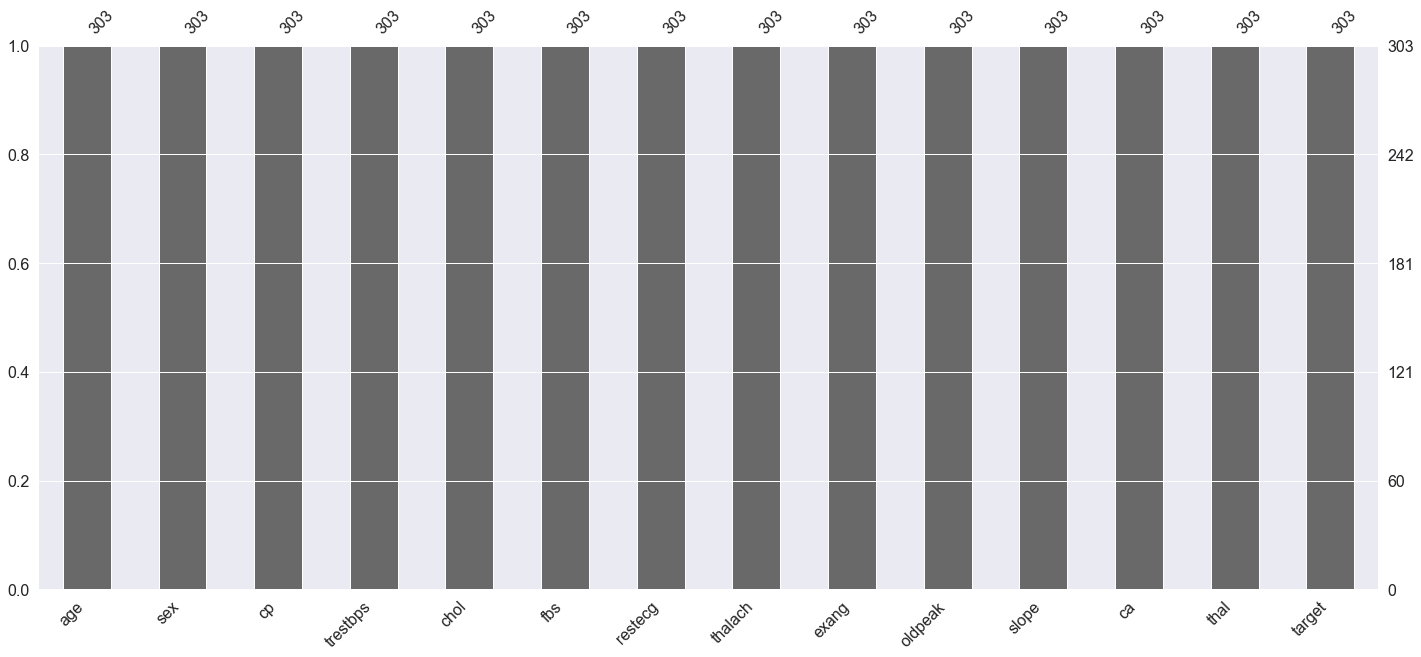

In [7]:
msno.bar(df)

Text(0.5, 1.0, 'Correlation Analysis')

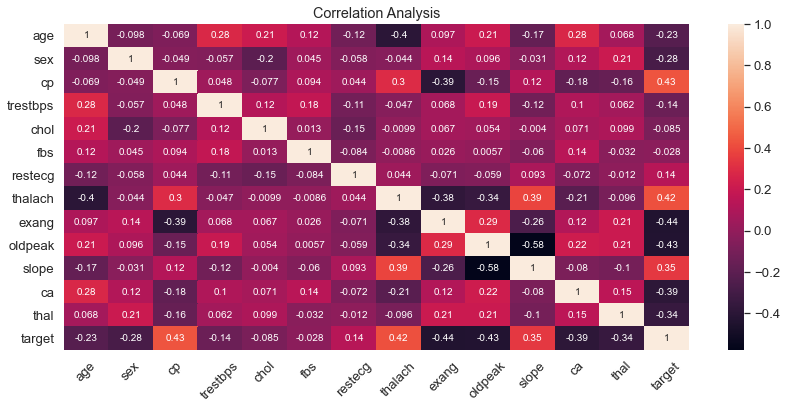

In [8]:
plt.figure(figsize = (14,6))
sb.heatmap(df.corr(), annot = True)
plt.xticks(rotation = 45)
plt.title("Correlation Analysis")

Text(0.5, 1.0, 'Distribution Plot and Normal Curve for Age Series')

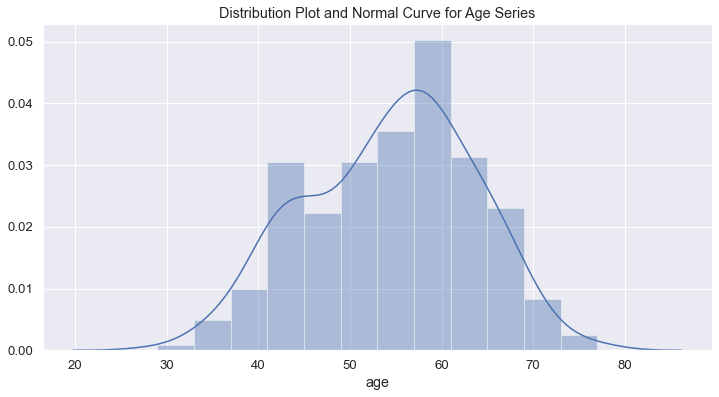

In [9]:
plt.figure(figsize = (12, 6))
sb.distplot(df["age"])
plt.title("Distribution Plot and Normal Curve for Age Series")

In [10]:
X = df[["age", "sex", "chol"]] # Independent Variable / Predicting Model
y = df["target"] # Dependent Variable / Target Outcome

In [11]:
dtc = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
acc_score = accuracy_score(y_test, pred)
print(f'Accuracy Score : {round(acc_score * 100)} %')

##def target_value(pred):
 #   if pred == 0:
 #       return "Not Prone to Heart Disease"
 #   elif pred == 1:
 #       return "Prone to Heart Disease"
    
#target_value(pred)


Accuracy Score : 64.0 %


In [12]:
dtc_report = classification_report(y_test, pred)
print(dtc_report)

              precision    recall  f1-score   support

           0       0.53      0.71      0.61        24
           1       0.76      0.59      0.67        37

    accuracy                           0.64        61
   macro avg       0.64      0.65      0.64        61
weighted avg       0.67      0.64      0.64        61



In [13]:
dtc.score(X_test, y_test)

0.639344262295082